### 풀이
- 격자판을 왼쪽부터 오른쪽으로 빈틈없이 세로 한줄씩 채워나간다고 상상해보자. \
  그렇다면 어떠한 배치는 한쪽 줄을 채우고서 다음 줄에 격자를 남기는 경우도 있을 것이다.
  - 예를 들어 세로가 3인 격자의 경우
  - 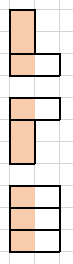
- 이렇게 (왼쪽에서) i-1번째 줄까지 빈틈없이 채웠을 때 i번째 줄의 격자의 배치 상태를 비트마스크로 볼 수 있다.
  - 0인 경우 격자가 없음(= 격자을 놓을 수 있는 상태), 1인 경우 격자가 있음(= 격자를 놓을 수 없는 상태)
  - i-1번째 줄을 채우고 그 다음 격자의 상태를 j라고 할때, DP를 정의할 수 있다.
- `DP[i][j]` = 격자를 `i-1`번째까지 채우고 그 다음 격자 상태가 j가 될 수 있는 경우의 수
  - 기저상태 DP[0][$000_2$] = 1
    - 아무것도 채워져 있지 않고 모든 칸이 비어있는 상태인 경우의 수를 1로 본다는 의미라고 굳이 해석할 수 있다.
  - 위 예시의 경우 DP[1][$001_2$] = 1, DP[1][$100_2$] = 1, DP[1][$111_2$] = 1
  - 그 다음 가능한 경우의 수는 $011_2, 110_2, 000_2$이 될 것이다.
    - 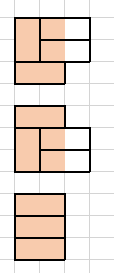
- 현재 줄의 격자 상태가 `x`였을 때, 이를 빈틈없이 채웠을때 나올 수 있는 다음 상태를 `y`라고 하고, \
  `x` 상태에서 `y`상태으로 갈 수 있다는 표현을 $x \rightarrow y$라고 한다면, 다음과 같은 점화식을 세울 수 있다.
  - $d_y(m+1) = \sum_{x \rightarrow y} d_x(m)$
- 그리고 N * M이 홀수면 빈공간없이 채울 수 없으므로 0을 출력한다.

#### x -> y의 패턴 구하기
- 참고한 풀이에서 적절한 트릭을 보여주긴 했지만, 조금 더 일반화된 방법으로 만들 수 있게 접근해보자.
- 아주 오랜만에 yield를 사용할 순간이 온 것 같다.
- 원래 1은 무조건 0이 되어야 한다. 그래야 빈틈없이 채워진 격자가 된다.
  - 그러나 이는 격자모양이 달라질 때 조금 다르게 해석할 여지는 있다.
- 그 빈칸 하나마다 가로 모양 격자를 놓는 경우를 만들 수 있다. 
  - 이 경우 원래 0이였던 공간이 1로 되는 것이라고 생각할 수 있다.
- 연속으로 0가 2번 나오는 경우는 세로 모양의 격자를 둘 수 있다.
  - 이 경우 0은 그대로 유지된다.
- `i-1`번째는 빈틈없이 채워야 하므로, 세로로 놓지 않은 공간은 전부 가로 모양의 격자를 놓는다고 했을 때  \
  세로모양의 격자를 0개 놓을 수 있는 경우, 1개 놓을 수 있는 경우, ...,N//2개 놓을 수 있는 경우를 생성하면 될 것 같다.

In [ ]:
def make(ret, cur, N) :
  for i in range(N-1): 
    if (cur >> i) & 1 and (cur >> (i + 1)) & 1 : #연속하는 2개의 비트가 1이면 0으로 바꾼 것을 추가한다.
      res = cur & ~(1 << i) & ~(1 << (i + 1))
      ret.add(res)
      make(ret, res, N)

memo = {}
def next(cur, N) : #현재 상태가 cur일 때 다음 상태
  if cur in memo :
    return memo[cur]

  ret = set()
  base = cur ^ (1 << N) - 1
  ret.add(base)

  make(ret, base, N)

  memo[cur] = ret
  return ret

def sol() :
  N, M = map(int, input().split())
  MOD = 9901
  if N * M % 2 :
    print(0)
    return

  DP = [[0] * (1 << N) for _ in range(M+1)]
  DP[0][0] = 1
  for i, l in enumerate(DP[:-1]) :
    for state, cnt in enumerate(l) :
      if not cnt: continue
      for k in next(state, N) :
        DP[i+1][k] = (DP[i+1][k] + cnt) % MOD

  print(DP[M][0] % MOD)

sol()

- 연속하는 2개의 비트를 처리하는 구현 자체도 어려웠고, 그러한 경우가 여러개 있는 경우를 고려하지 못해서 디버깅도 오래걸렸다.
- dfs를 언제 활용해야 할지 떠올리는데에 좋은 도움이 됐다.

### 개선
- 비트 필드를 뒤집는 부분을 약간 개선했다. 
- 사용성을 위해 약간 더 설명적인 코드를 적었다.

In [ ]:
def make(ret, cur, N) :
  for i in range(N-1): 
    if (cur >> i) & 1 and (cur >> i + 1) & 1 : #연속하는 2개의 비트가 1이면 0으로 바꾼 것을 추가한다.
      res = cur & ~(3 << i)
      ret.add(res)
      make(ret, res, N)
  
memo = {}
def next(cur, N) : #현재 상태가 cur일 때 다음 상태
  if cur in memo :
    return memo[cur]

  ret = set()
  mask = (1 << N) - 1
  base = cur ^ mask
  ret.add(base)

  make(ret, base, N)

  memo[cur] = ret
  return ret

In [ ]:
MOD = 9901

def go(N, M, DP, i, B) :
  if i >= N * M :
    if i == N * M and B == 0 : 
      return 1 #모든 칸을 지나가고 마지막 칸이 비어있는 경우
    return 0

  if DP[i][B] != -1 :
    return DP[i][B]

  res = 0
  if B & 1 : #현재 칸이 채워져있을 경우 자르지 않는다
    res += go(N, M, DP, i + 1, B >> 1)
    res %= MOD
  else : #그렇지 않을경우 어떻게든 자른다 (빈칸이 있어선 안된다)
    res += go(N, M, DP, i + 1, B >> 1 | (1 << (M-1))) #세로로 자른 결과를 더한다 
    res %= MOD
    if i % M != (M-1) and B & 2 == 0 : #가로로 자를 수 있는 경우 그 결과를 더한다
      res += go(N, M, DP, i + 2, B >> 2)
      res %= MOD
  DP[i][B] = res % MOD
  return DP[i][B]

def sol() :
  N, M = map(int, input().split()) #가로 세로
  DP = [[-1] * (1 << M) for _ in range(N * M)] #DP[i][j] = i번째 칸 뒤 M개의 칸의 상태가 j일 때 격자판을 채울 수 있는 경우의 수. 단, i-1번째 칸 까지는 모두 채워져야 한다.
  go(N, M, DP, 0, 0)
  print(DP[0][0] % MOD)
  
sol()

좀더 잘 알려진 풀이로 푼 방법.